In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%config InlineBackend.figure_format = 'retina'


# Sum of Random Variables

This notebook explores what happens when we add random variables together. We'll examine both continuous and discrete cases, comparing simulation results with theoretical predictions.

## Learning Objectives
- Understand how sums of random variables behave
- Compare empirical distributions with theoretical results
- Explore the convolution property for independent random variables
- Visualize distributions using kernel density estimation

Let's start by importing the necessary libraries:

## Case 1: Sum of Normal Random Variables

When we add independent normal random variables, the result is also normally distributed. Let's verify this through simulation.

We have:
- X ~ N(0, 1) (standard normal)
- Y ~ N(0, 2) (normal with standard deviation 2)

Theory tells us that X + Y ~ N(0, √(1² + 2²)) = N(0, √5):

Let's sample from these distributions and visualize them:

Now let's compute the sum S = X + Y and visualize all three distributions:

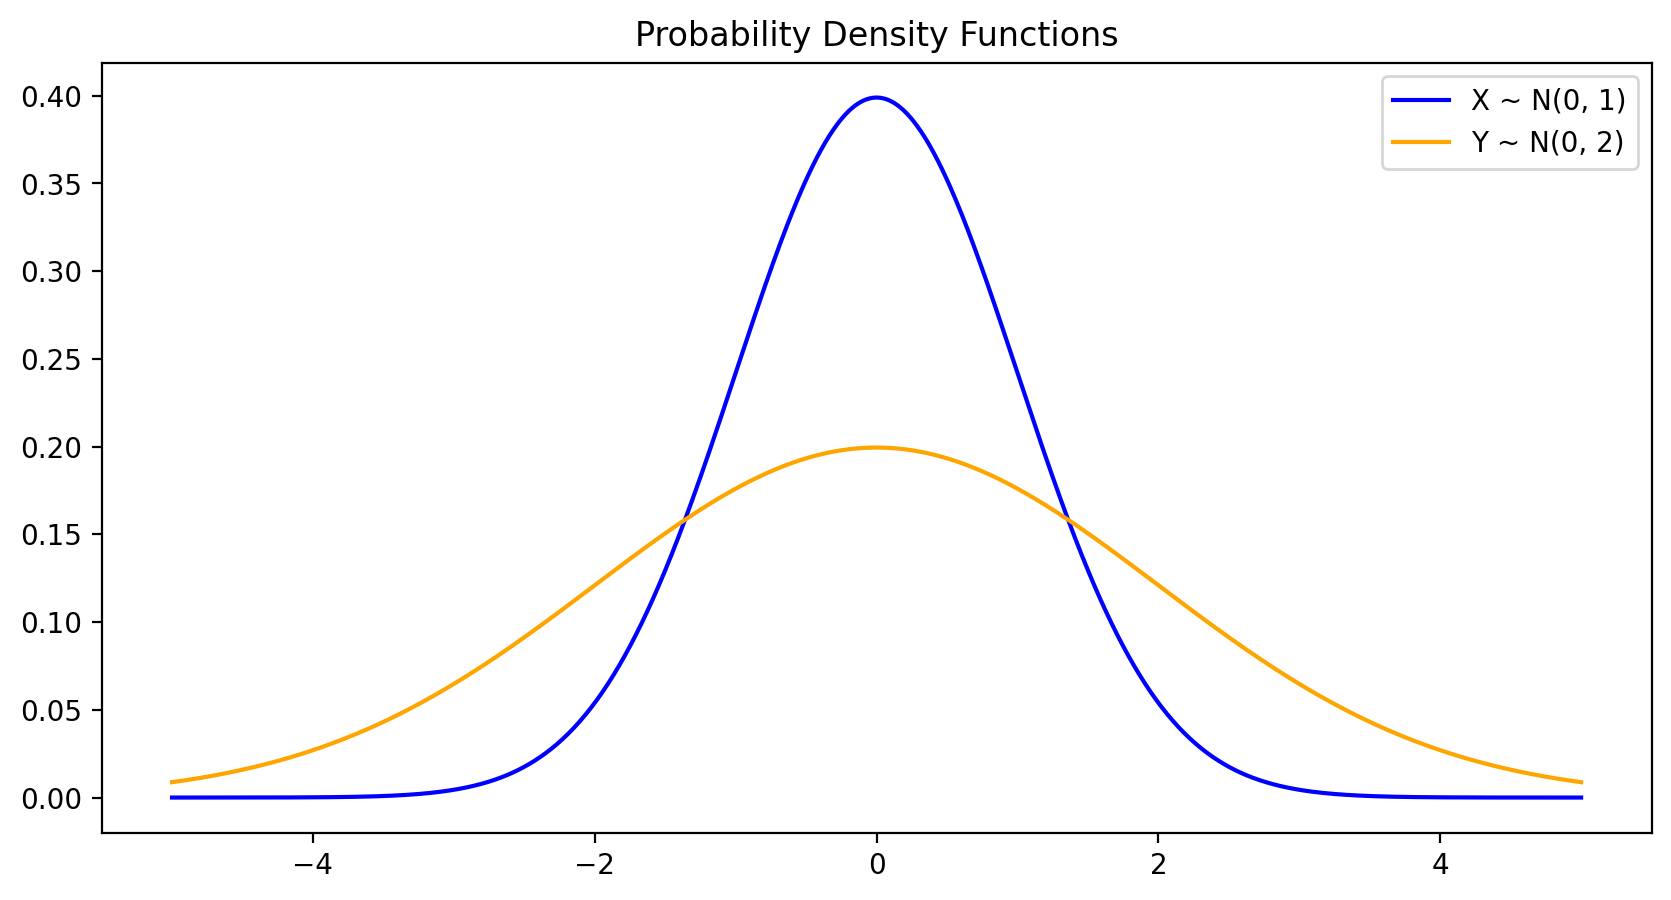

In [5]:
X = torch.distributions.Normal(0, 1)
Y = torch.distributions.Normal(0, 2)

x_range = torch.linspace(-5, 5, 1000)
X_pdf = X.log_prob(x_range).exp()
Y_pdf = Y.log_prob(x_range).exp()

plt.figure(figsize=(10, 5))
plt.plot(x_range.numpy(), X_pdf.numpy(), label='X ~ N(0, 1)', color='blue')
plt.plot(x_range.numpy(), Y_pdf.numpy(), label='Y ~ N(0, 2)', color='orange')

plt.title('Probability Density Functions')
plt.legend()

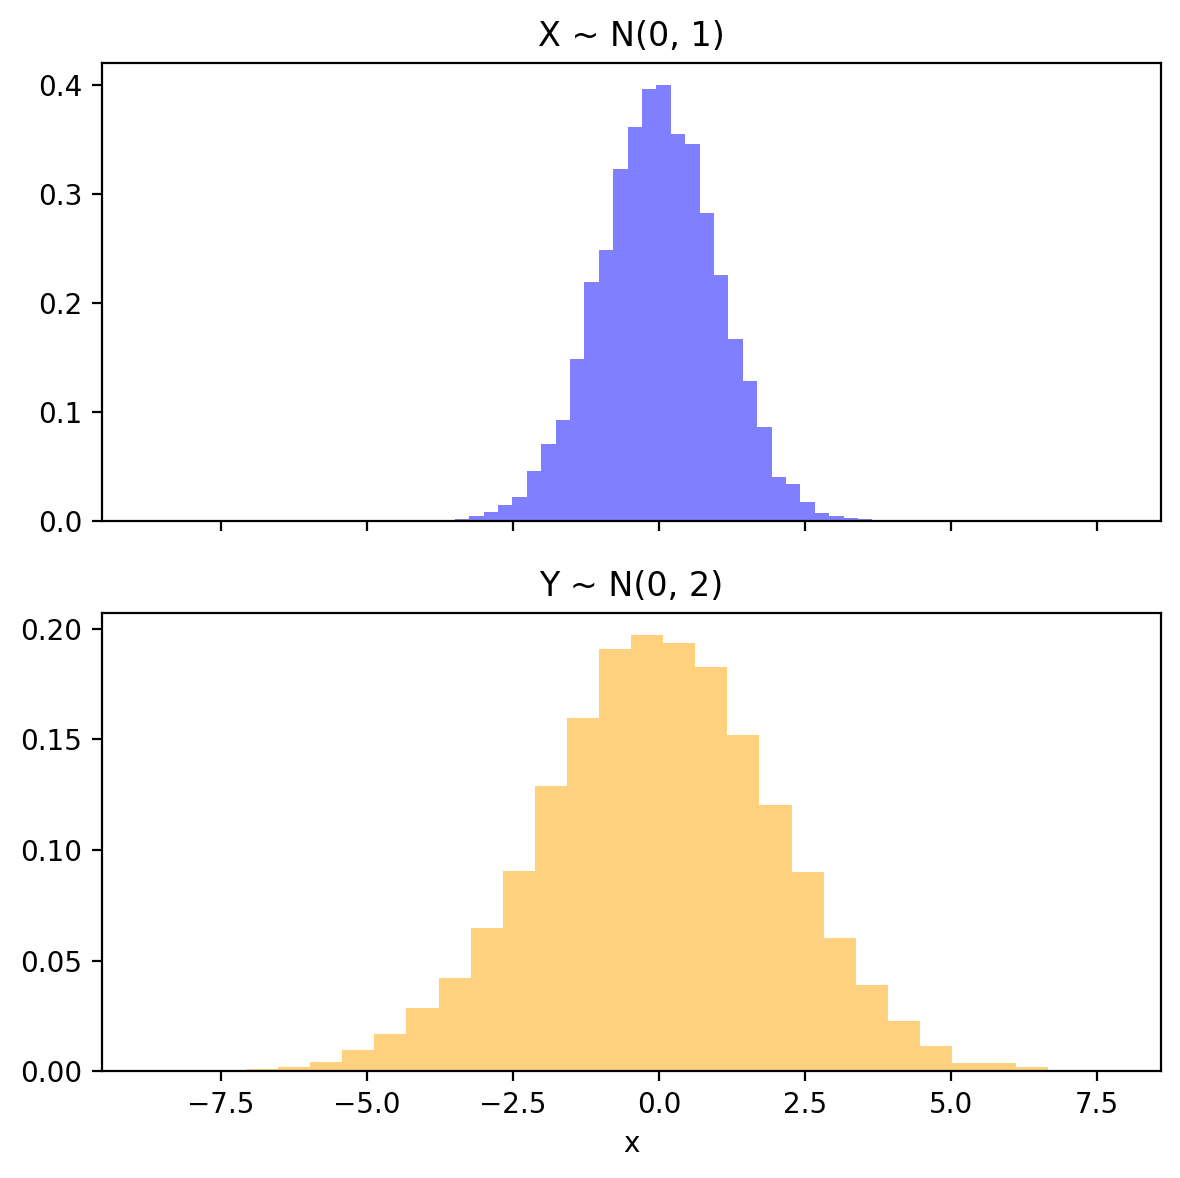

In [6]:
x_samples = X.sample((10000,))
y_samples = Y.sample((10000,))
fig, ax = plt.subplots(2, 1, figsize=(6, 6), sharex=True)
ax[0].hist(x_samples.numpy(), bins=30, density=True, alpha=0.5, color='blue')
ax[1]. hist(y_samples.numpy(), bins=30, density=True, alpha=0.5, color='orange')
ax[0].set_title('X ~ N(0, 1)')
ax[1].set_title('Y ~ N(0, 2)')
plt.xlabel('x')
fig.tight_layout()

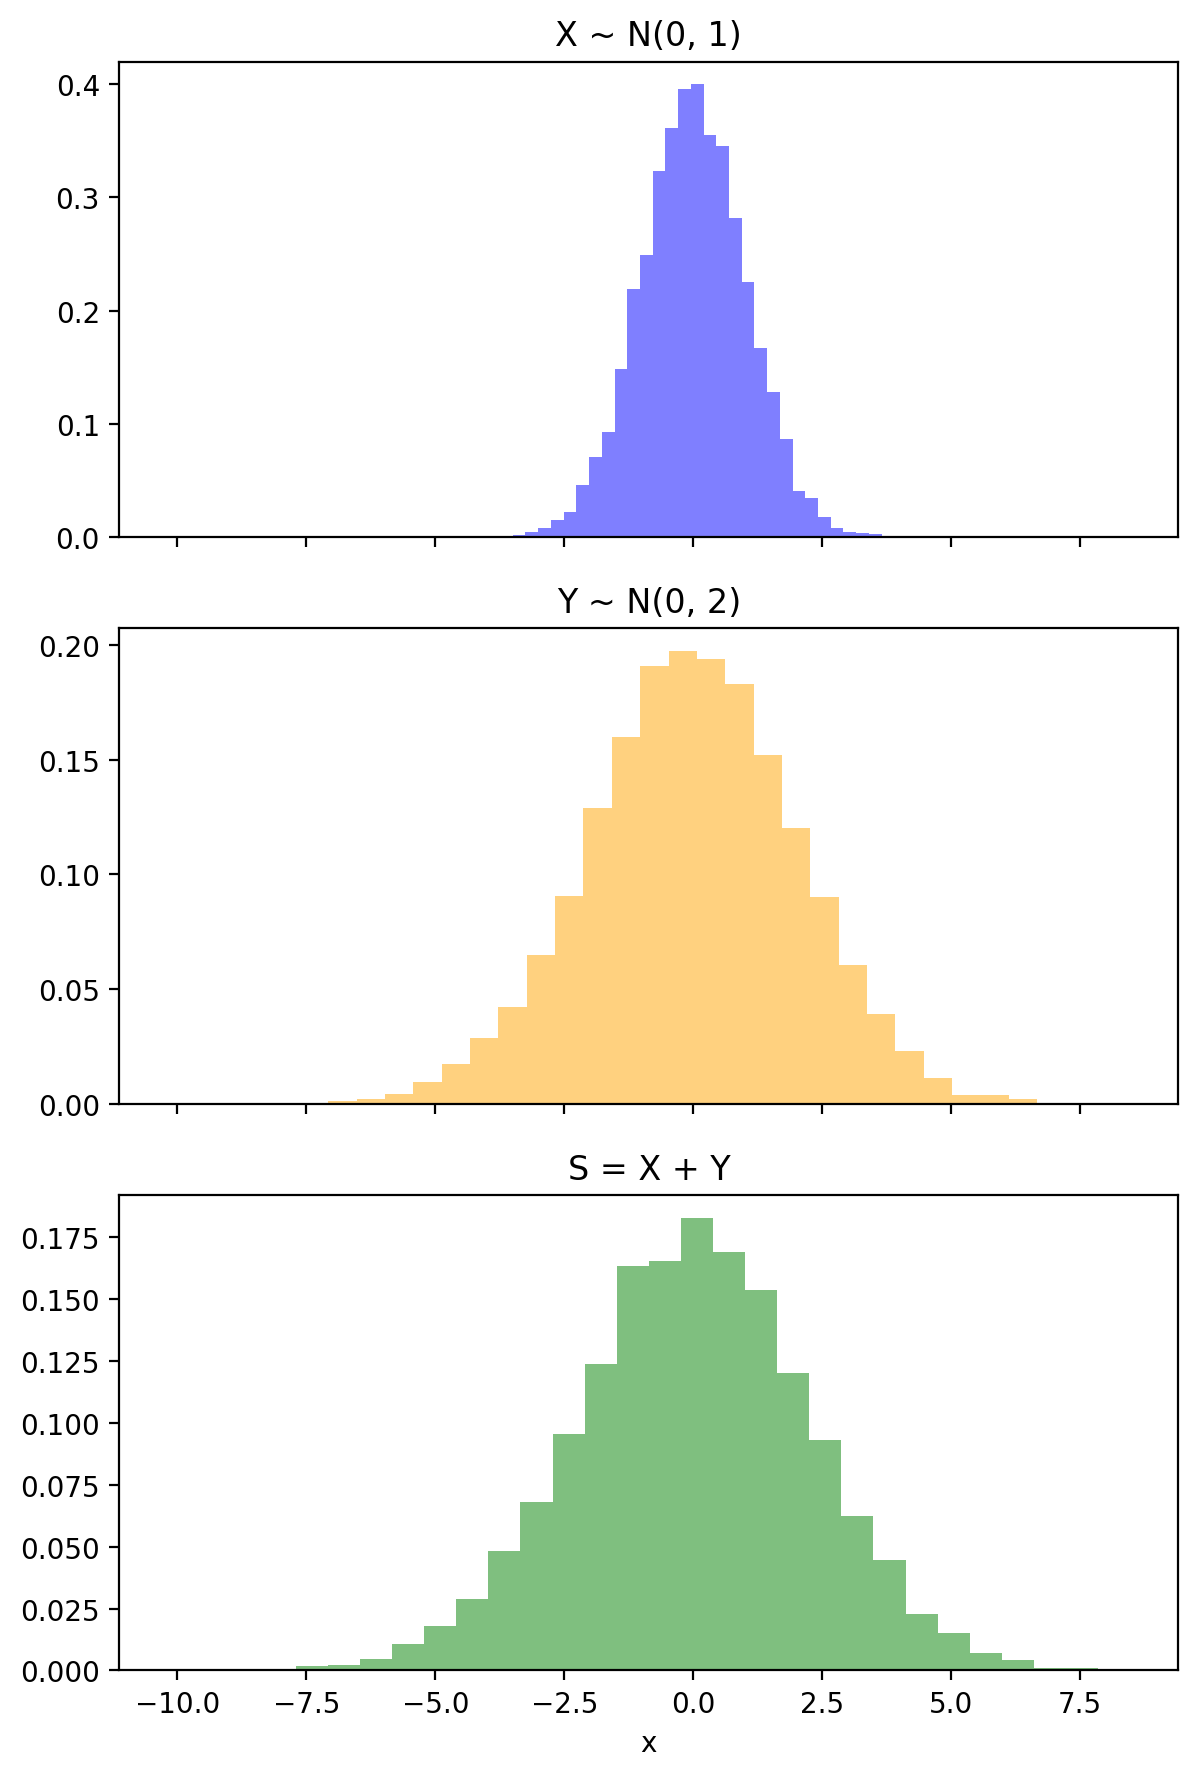

In [7]:
s_samples = x_samples + y_samples
fig, ax = plt.subplots(3, 1, figsize=(6, 9), sharex=True)
ax[0].hist(x_samples.numpy(), bins=30, density=True, alpha=0.5, color='blue')
ax[1].hist(y_samples.numpy(), bins=30, density=True, alpha=0.5, color='orange')
ax[2].hist(s_samples.numpy(), bins=30, density=True, alpha=0.5, color='green')
ax[0].set_title('X ~ N(0, 1)')
ax[1].set_title('Y ~ N(0, 2)')
ax[2].set_title('S = X + Y')
plt.xlabel('x')
plt.tight_layout()


In [8]:
torch.distributions.Normal?

Init signature: torch.distributions.Normal(loc, scale, validate_args=None)
Docstring:     
Creates a normal (also called Gaussian) distribution parameterized by
:attr:`loc` and :attr:`scale`.

Example::

    >>> # xdoctest: +IGNORE_WANT("non-deterministic")
    >>> m = Normal(torch.tensor([0.0]), torch.tensor([1.0]))
    >>> m.sample()  # normally distributed with loc=0 and scale=1
    tensor([ 0.1046])

Args:
    loc (float or Tensor): mean of the distribution (often referred to as mu)
    scale (float or Tensor): standard deviation of the distribution
        (often referred to as sigma)
File:           ~/base/lib/python3.12/site-packages/torch/distributions/normal.py
Type:           type
Subclasses:     

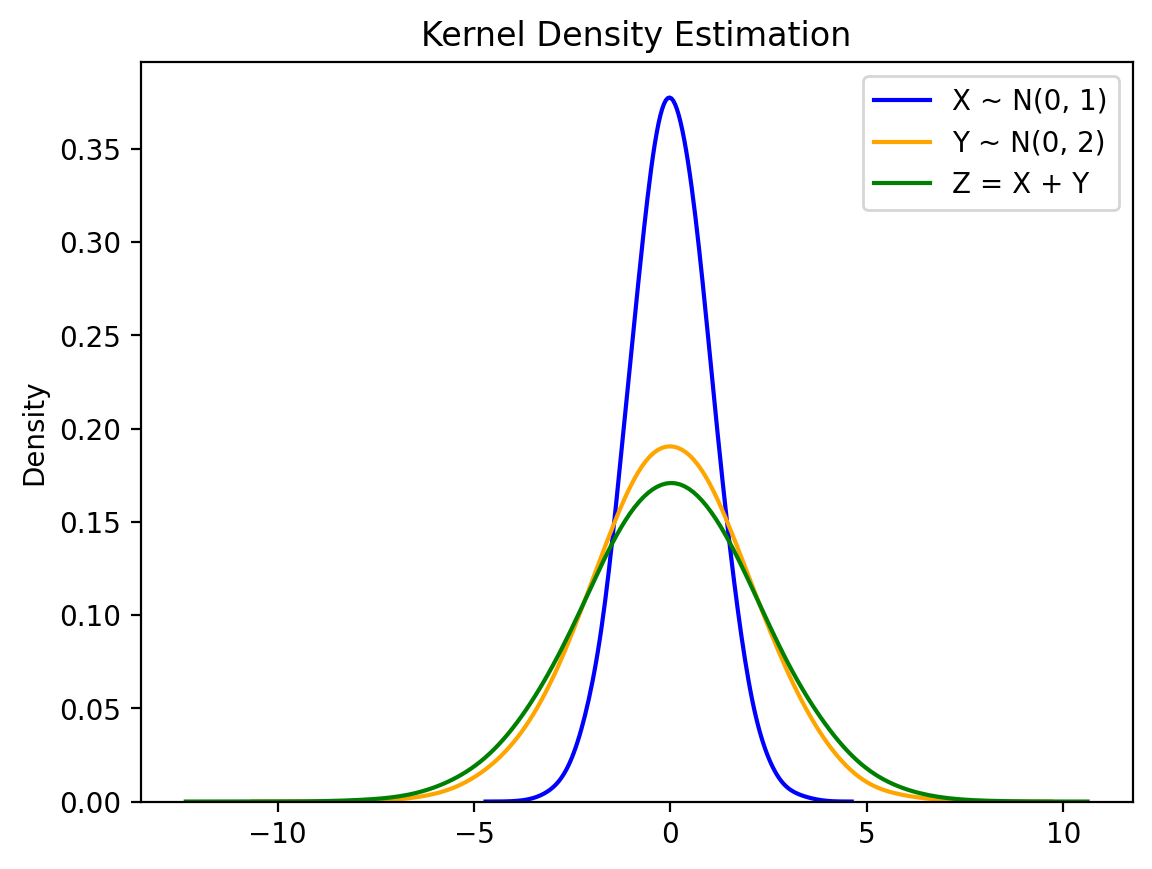

In [9]:
sns.kdeplot(x_samples.numpy(), label='X ~ N(0, 1)', color='blue', bw_adjust=2)
sns.kdeplot(y_samples.numpy(), label='Y ~ N(0, 2)', color='orange', bw_adjust=2)
sns.kdeplot(s_samples.numpy(), label='Z = X + Y', color='green', bw_adjust=2)
plt.title('Kernel Density Estimation')

plt.legend()

In [10]:
s_samples.std()

tensor(2.2586)

In [11]:
s_samples.mean()

tensor(-0.0113)

In [12]:
s_analytic = torch.distributions.Normal(0, np.sqrt(1**2 + 2**2))
s_analytic.mean, s_analytic.stddev

(tensor(0.), tensor(2.2361))

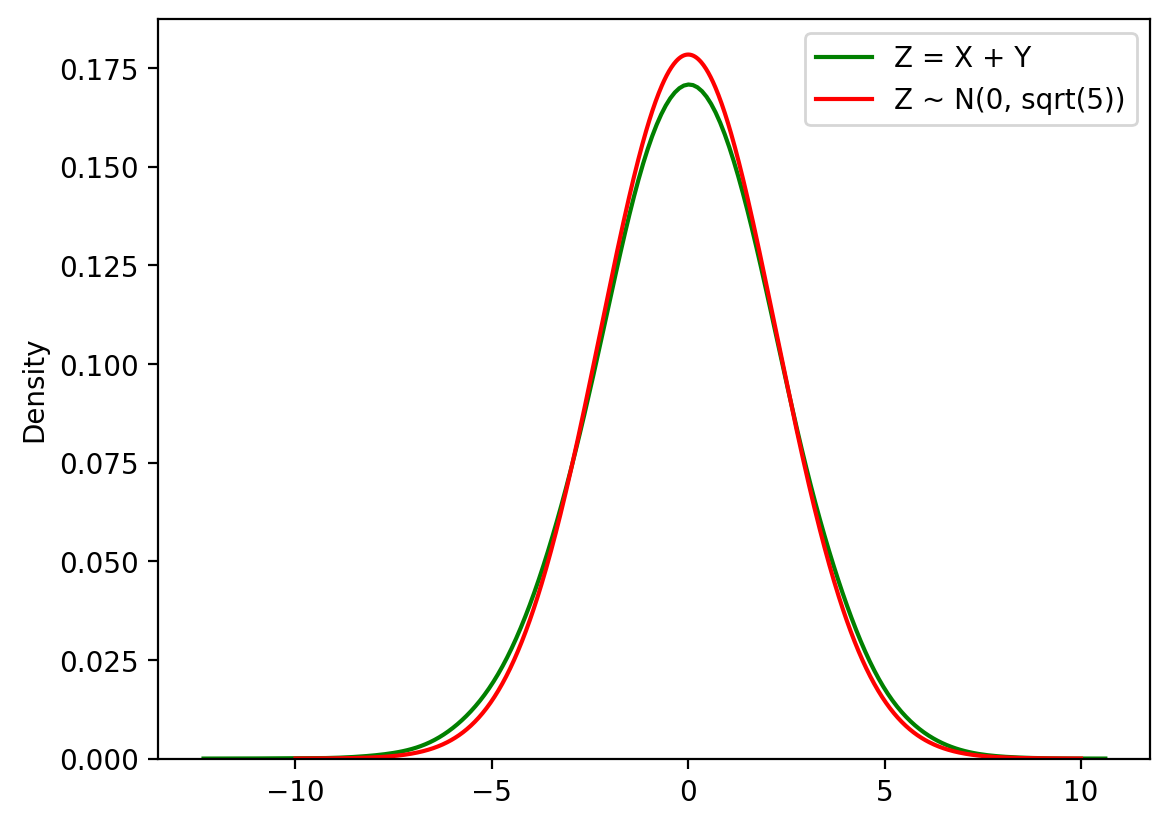

In [14]:
sns.kdeplot(s_samples.numpy(), label='Z = X + Y', color='green', bw_adjust=2)
s_range = torch.linspace(-10, 10, 1000)
s_pdf = s_analytic.log_prob(s_range).exp()
plt.plot(s_range.numpy(), s_pdf.numpy(), label='Z ~ N(0, sqrt(5))', color='red')
plt.legend()

In [15]:
### Example 2

X = torch.distributions.Categorical(torch.tensor([0.25, 0.25, 0.25, 0.25]))
Y = torch.distributions.Categorical(torch.tensor([0.25, 0.25, 0.25, 0.25]))

x_samples = X.sample((10000,))
y_samples = Y.sample((10000,))

Text(0.5, 0, 'x')

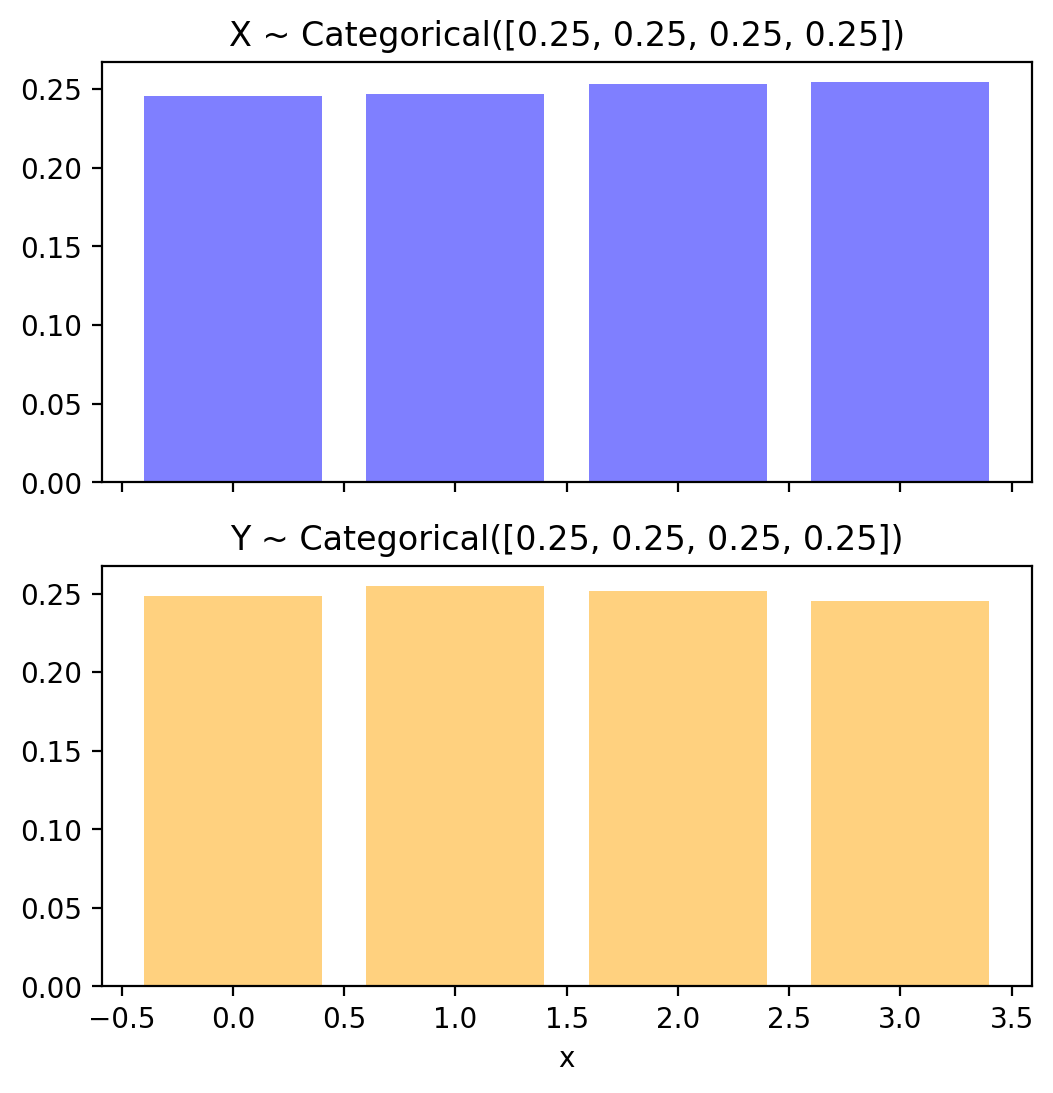

In [16]:
fig, ax = plt.subplots(2, 1, figsize=(6, 6), sharex=True)

x_samples_normed = pd.Series(x_samples.numpy()).value_counts(normalize=True).sort_index()
y_samples_normed = pd.Series(y_samples.numpy()).value_counts(normalize=True).sort_index()

ax[0].bar(x_samples_normed.index, x_samples_normed.values, alpha=0.5, color='blue')
ax[1].bar(y_samples_normed.index, y_samples_normed.values, alpha=0.5, color='orange')
ax[0].set_title('X ~ Categorical([0.25, 0.25, 0.25, 0.25])')
ax[1].set_title('Y ~ Categorical([0.25, 0.25, 0.25, 0.25])')
plt.xlabel('x')


Text(0.5, 0, 'x')

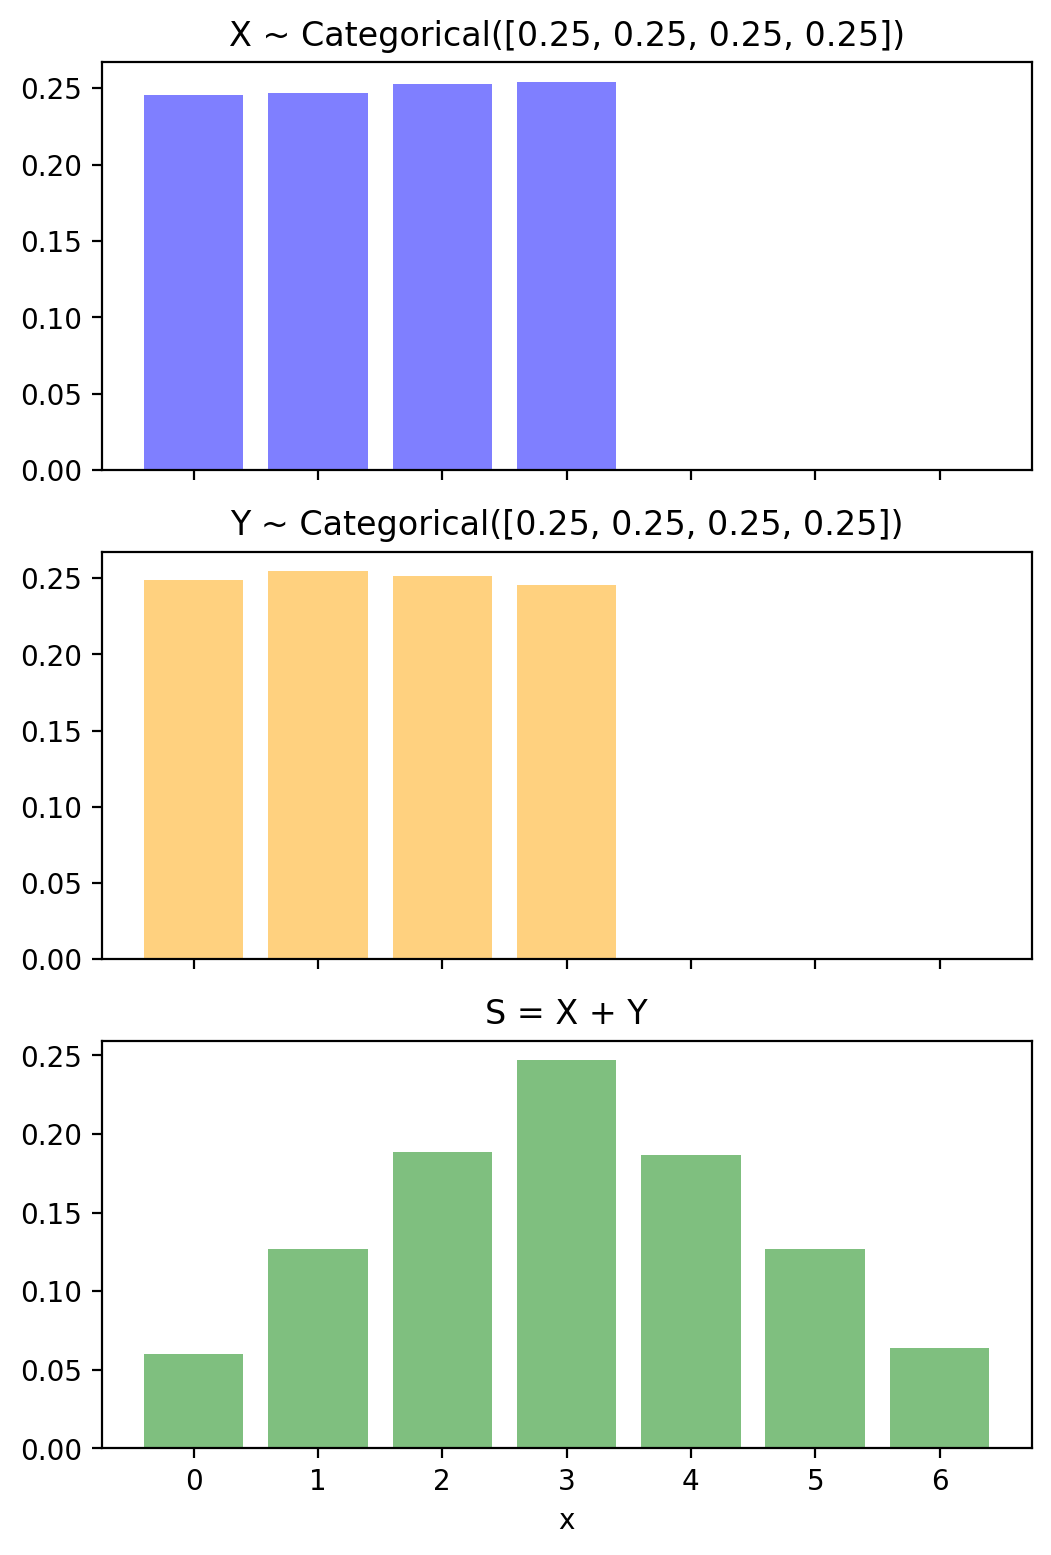

In [17]:
s_samples = x_samples + y_samples
fig, ax = plt.subplots(3, 1, figsize=(6, 9), sharex=True)
s_samples_normed = pd.Series(s_samples.numpy()).value_counts(normalize=True).sort_index()
ax[0].bar(x_samples_normed.index, x_samples_normed.values, alpha=0.5, color='blue')
ax[1].bar(y_samples_normed.index, y_samples_normed.values, alpha=0.5, color='orange')
ax[2].bar(s_samples_normed.index, s_samples_normed.values, alpha=0.5, color='green')
ax[0].set_title('X ~ Categorical([0.25, 0.25, 0.25, 0.25])')
ax[1].set_title('Y ~ Categorical([0.25, 0.25, 0.25, 0.25])')
ax[2].set_title('S = X + Y')
plt.xlabel('x')

